# 9.

Implementações Computacionais de Redes Neurais.

Para cada um dos problemas abaixo apresente a solução fazendo uso de redes. Apresente na solução a curva do erro de treinamento e o erro de validação:

## 9.1

Defina a estrutura de uma rede perceptron de múltiplas camadas para aproximar a função:

 $f(x) = 16x_1² + x_1x_2 + 8x_2² - x_1 - x_2 + ln(1 + x_1² + x_2²)$


In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Função para gerar dados de treinamento
def generate_data(n_samples):
    np.random.seed(0)
    x1 = np.random.rand(n_samples) * 10 - 5
    x2 = np.random.rand(n_samples) * 10 - 5
    y = 16 * x1**2 + x1 * x2 + 8 * x2**2 - x1 - x2 + np.log(1 + x1**2 + x2**2)
    X = np.column_stack((x1, x2))
    return X, y.reshape(-1, 1)

# Gerando dados de treinamento
X_train, y_train = generate_data(1000)
X_val, y_val = generate_data(200)

# Definindo a arquitetura da rede
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compilando o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinando o modelo e acompanhando o erro de validação
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=1, validation_data=(X_val, y_val))

Epoch 1/1000
32/32 [==============================] - 1s 13ms/step - loss: 62505.0195 - val_loss: 59318.6602
Epoch 2/1000
32/32 [==============================] - 0s 8ms/step - loss: 62296.4141 - val_loss: 59132.4141
Epoch 3/1000
32/32 [==============================] - 0s 8ms/step - loss: 62099.3984 - val_loss: 58946.9336
Epoch 4/1000
32/32 [==============================] - 0s 8ms/step - loss: 61902.6172 - val_loss: 58758.0000
Epoch 5/1000
32/32 [==============================] - 0s 11ms/step - loss: 61697.7148 - val_loss: 58563.4336
Epoch 6/1000
32/32 [==============================] - 0s 10ms/step - loss: 61485.4570 - val_loss: 58359.8359
Epoch 7/1000
32/32 [==============================] - 0s 9ms/step - loss: 61257.7656 - val_loss: 58139.4453
Epoch 8/1000
32/32 [==============================] - 0s 8ms/step - loss: 61017.5625 - val_loss: 57900.0391
Epoch 9/1000
32/32 [==============================] - 0s 8ms/step - loss: 60759.6719 - val_loss: 57650.3750
Epoch 10/1000
32/32 [====

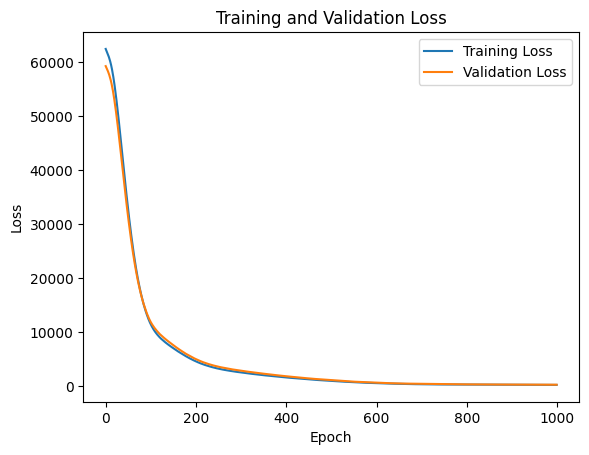

In [9]:
# Plotando a curva do erro de treinamento e erro de validação
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
# Gerando novos dados para previsão
X_new, _ = generate_data(100)

# Calculando os valores reais de saída usando a função f(x) para os novos dados de entrada
y_real = np.zeros((len(X_new), 1))
for i in range(len(X_new)):
    x1, x2 = X_new[i]
    y_real[i] = 16 * x1**2 + x1 * x2 + 8 * x2**2 - x1 - x2 + np.log(1 + x1**2 + x2**2)

# Fazendo previsões usando o modelo treinado
y_pred = model.predict(X_new)

for i in range(10):
    print("Entrada:", X_new[i])
    print("Saída Real:", y_real[i])
    print("Saída Prevista:", y_pred[i])

4/4 [==============================] - 0s 2ms/step
Entrada: [0.48813504 1.77816537]
Saída Real: [29.19071224]
Saída Prevista: [18.976273]
Entrada: [ 2.15189366 -2.29992027]
Saída Real: [113.99687168]
Saída Prevista: [114.1291]
Entrada: [1.02763376 2.35194022]
Saída Real: [62.21336241]
Saída Prevista: [54.459335]
Entrada: [0.44883183 4.62188545]
Saída Real: [174.23785679]
Saída Prevista: [167.31696]
Entrada: [-0.76345201 -2.51246856]
Saída Real: [67.08607441]
Saída Prevista: [67.56934]
Entrada: [1.45894113 0.76157334]
Saída Real: [38.89730377]
Saída Prevista: [1.3459663]
Entrada: [-0.62412789  0.92041931]
Saída Real: [12.94419766]
Saída Prevista: [-4.498999]
Entrada: [3.91773001 0.72251906]
Saída Real: [250.76996543]
Saída Prevista: [257.3979]
Entrada: [ 4.63662761 -2.76918367]
Saída Real: [394.01969557]
Saída Prevista: [392.9813]
Entrada: [-1.16558481  4.52749012]
Saída Real: [180.21290886]
Saída Prevista: [175.88043]


313/313 [==============================] - 1s 3ms/step


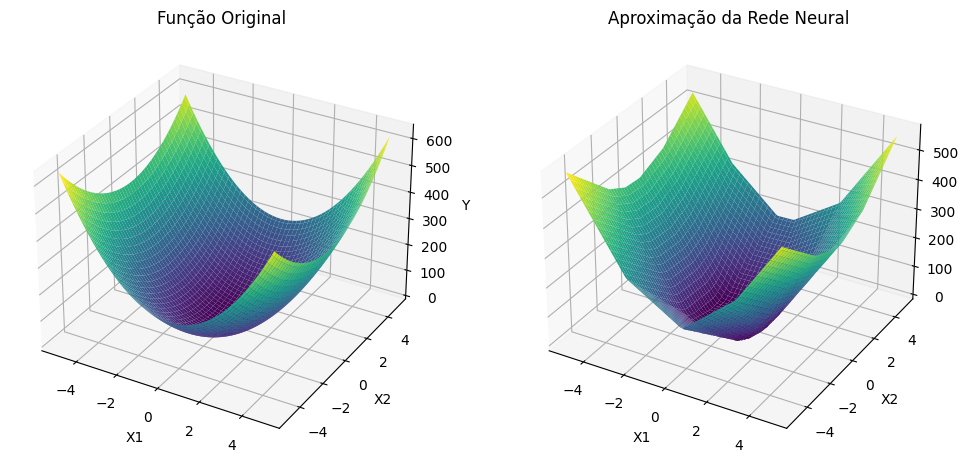

In [11]:
# Função original
def original_function(x1, x2):
    return 16 * x1**2 + x1 * x2 + 8 * x2**2 - x1 - x2 + np.log(1 + x1**2 + x2**2)

# Gerando pontos para plotagem
x1_values = np.linspace(-5, 5, 100)
x2_values = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1_values, x2_values)
Z_original = original_function(X1, X2)

# Calculando a aproximação da rede neural
Z_approx = model.predict(np.vstack([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Plotando
fig = plt.figure(figsize=(12, 6))

# Plot da função original
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X1, X2, Z_original, cmap='viridis')
ax1.set_title('Função Original')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('Y')

# Plot da aproximação da rede neural
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X1, X2, Z_approx, cmap='viridis')
ax2.set_title('Aproximação da Rede Neural')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('Y')

plt.show()


## 9.2

Considere o problema das espirais. Sendo a espiral 1 uma classe e a espiral 2 outra classe. Gere as curvas das espirais usando as seguintes equações:

- Espiral 1:

  $x = \frac{\theta}{4}cos(\theta), ~y = \frac{\theta}{4}sen(\theta), ~\theta \geq 0$

- Espiral 2:

  $x = (\frac{\theta}{4} + 0.8)cos(\theta), ~y = (\frac{\theta}{4} + 0.8)sen(\theta), ~\theta \geq 0$

Solucione este problema utilizando uma rede perceptron de múltiplas camadas. Gere a partir das equações os dados para treinamento e teste. Determine a **matriz de confusão**.

In [21]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Funções para gerar os dados das espirais
def spiral_1(theta):
    x = (theta / 4) * np.cos(theta)
    y = (theta / 4) * np.sin(theta)
    return x, y

def spiral_2(theta):
    x = ((theta / 4) + 0.8) * np.cos(theta)
    y = ((theta / 4) + 0.8) * np.sin(theta)
    return x, y

# Gerar dados de treinamento e teste
def generate_data(num_samples):
    # Gerar pontos para a espiral 1
    theta_1 = np.linspace(0, 10 * np.pi, num_samples)
    x1, y1 = spiral_1(theta_1)
    labels_1 = np.zeros(num_samples)

    # Gerar pontos para a espiral 2
    theta_2 = np.linspace(0, 10 * np.pi, num_samples)
    x2, y2 = spiral_2(theta_2)
    labels_2 = np.ones(num_samples)

    # Combinar os dados das duas espirais
    X = np.concatenate([np.vstack((x1, y1)).T, np.vstack((x2, y2)).T])
    y = np.concatenate([labels_1, labels_2])

    return X, y

# Gerar dados de treinamento e teste
X_train, y_train = generate_data(1000)
X_test, y_test = generate_data(500)

# Treinar a MLP com parâmetros ajustados
mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=10000, learning_rate_init=0.001, solver='adam')
mlp.fit(X_train, y_train)

# Prever os rótulos para os dados de teste
y_pred = mlp.predict(X_test)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

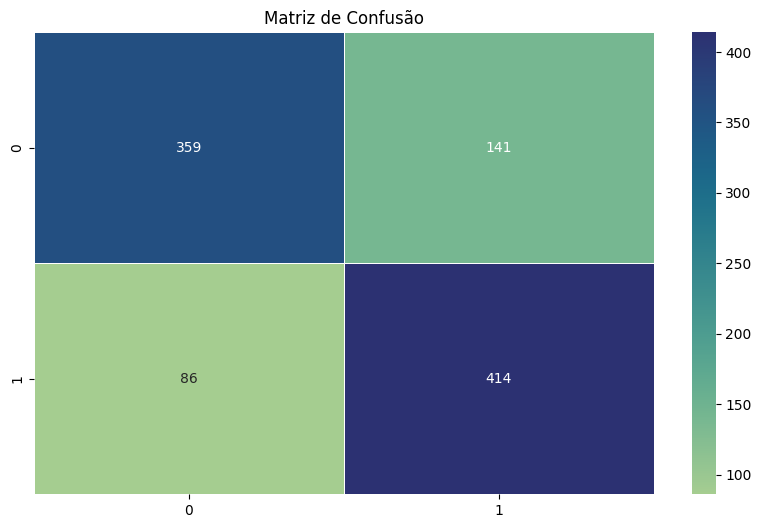

In [23]:
# Plotar a matriz de confusão com seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="crest", linewidths=.5)

plt.title("Matriz de Confusão")
plt.show()


## 9.3

Considere o problema de classificação de padrões bidimensionais constituído neste
caso de 5 padrões. A distribuição dos padrões tem como base um quadrado centrado na
origem interceptando os eixos nos pontos +1 e -1 de cada eixo. Os pontos +1 e -1 de cada
eixo são centros de quatro semicírculos que se interceptam no interior do quadrado originando uma classe e as outras quatro classes nas regiões de não interseção. Após gerar aleatoriamente dados que venham formar estas distribuições de dados, selecione um conjunto
de treinamento e um conjunto de validação. Treine uma rede perceptron para classificar os
padrões associados a cada uma das classes. Verifique o desempenho do classificador usando o conjunto de validação e calculando a matriz de confusão.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import Perceptron

num_samples_per_class = 1000
num_classes = 5

X = []
y = []

for i in range(num_classes):
    radius = np.random.uniform(0, 1)
    theta = np.random.uniform(i*np.pi/2, (i+1)*np.pi/2, num_samples_per_class)
    x = radius * np.cos(theta)
    y_ = radius * np.sin(theta)
    X.extend(list(zip(x, y_)))
    y.extend([i] * num_samples_per_class)

X = np.array(X)
y = np.array(y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(50, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Fazer previsões no conjunto de validação
y_pred = mlp.predict(X_val)


In [38]:
# Calcular métricas de avaliação
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

print("\nMétricas de Avaliação:")
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Pontuação F1: {f1:.2f}")



Métricas de Avaliação:
Acurácia: 0.65
Precisão: 0.60
Recall: 0.65
Pontuação F1: 0.58


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


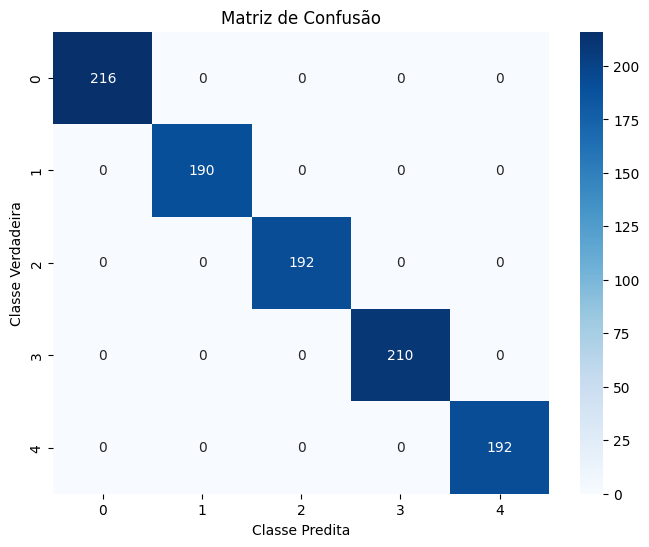

In [36]:
# Calcular matriz de confusão
conf_matrix = confusion_matrix(y_val, y_pred)

# Plotar matriz de confusão com seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Matriz de Confusão')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.show()


# Calculando com apenas um perceptron

In [41]:
num_samples_per_class = 1000
num_classes = 5

X = []
y = []

for i in range(num_classes):
    radius = np.random.uniform(0, 1)
    theta = np.random.uniform(i*np.pi/2, (i+1)*np.pi/2, num_samples_per_class)
    x = radius * np.cos(theta)
    y_ = radius * np.sin(theta)
    X.extend(list(zip(x, y_)))
    y.extend([i] * num_samples_per_class)

X = np.array(X)
y = np.array(y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

# Fazer previsões no conjunto de validação
y_pred = perceptron.predict(X_val)

In [42]:
# Calcular métricas de avaliação
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

print("\nMétricas de Avaliação:")
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Pontuação F1: {f1:.2f}")


Métricas de Avaliação:
Acurácia: 0.86
Precisão: 0.90
Recall: 0.86
Pontuação F1: 0.84


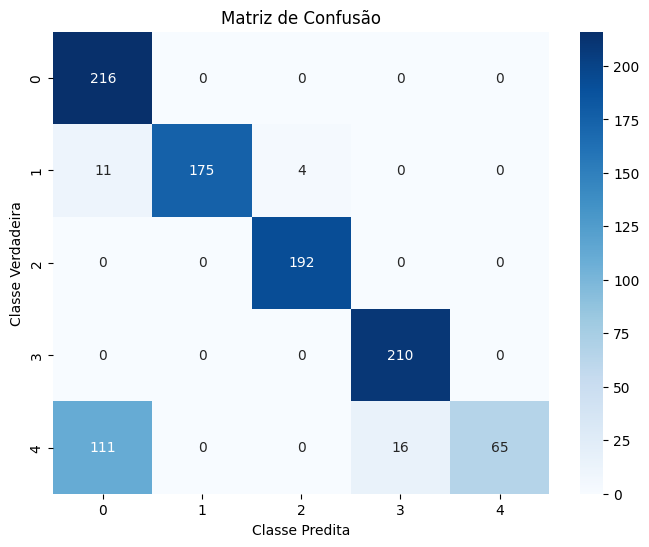

In [43]:
# Calcular matriz de confusão
conf_matrix = confusion_matrix(y_val, y_pred)

# Plotar matriz de confusão com seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Matriz de Confusão')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.show()
